# Computer Vision Masterclass - Face detection

## OpenCV

### Loading the image

In [5]:
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Computer_vision/Images/people1.jpg')

In [ ]:
image.shape

In [ ]:
#cv2.imshow(image)  #colab에서는 사용 불가
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [ ]:
image = cv2.resize(image, (800, 600))
image.shape

(600, 800, 3)

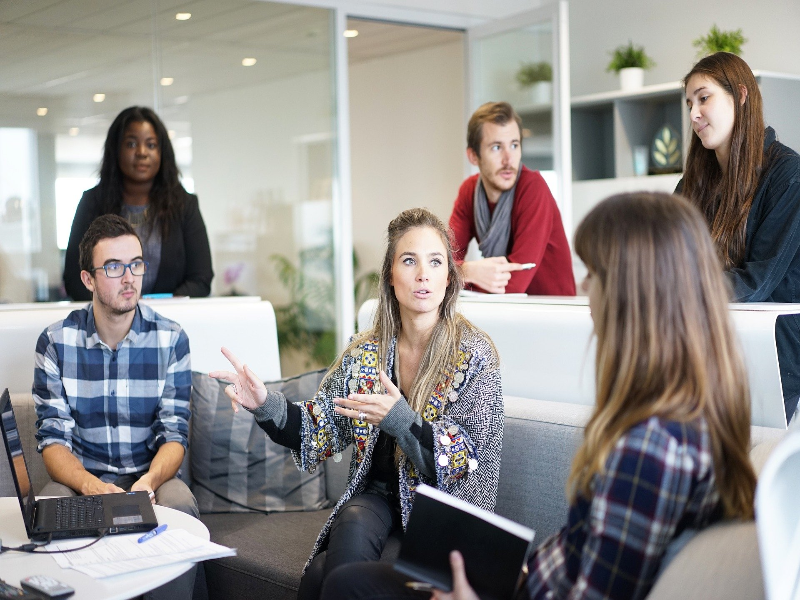

In [ ]:
cv2_imshow(image)

In [ ]:
600 * 800 * 3, 600 * 800, 1440000 - 480000
# 600*800 * 3 = 총 픽셀 값 * 채널 수 => 칼라
# 컬러 이미지에서 이미지를 흑백으로 바꾸려면 컬러 값에서 픽셀값을 빼야함
# (600*800*3) - (600*800) = 흑백 이미지

(1440000, 480000, 960000)

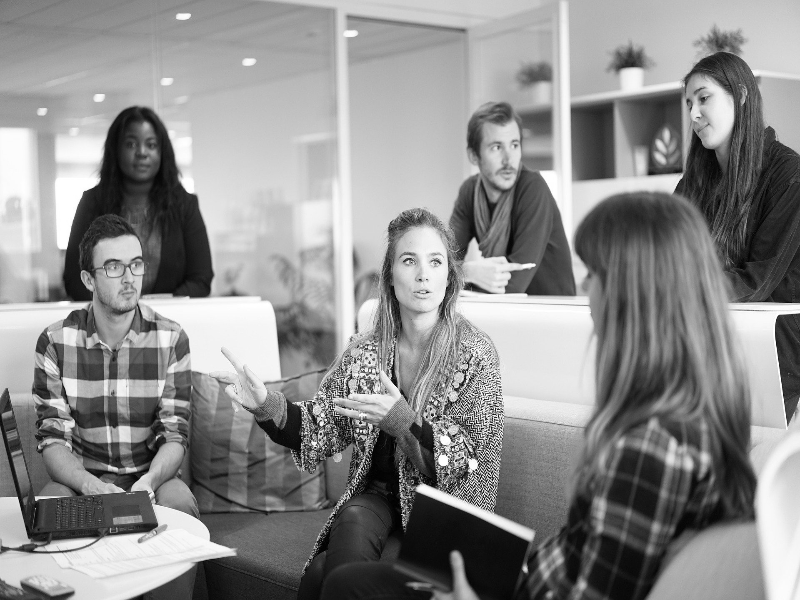

In [ ]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(image_gray)

In [ ]:
image.shape
#컬러

(600, 800, 3)

In [ ]:
image_gray.shape
#흑백

(600, 800)

### Detecting faces

In [ ]:
# face_detector => 탐지
# xml 파일 -> 얼굴 감지에 사용할 수 있도록 학습이 완료된 파일
face_detector = cv2.CascadeClassifier('/content/drive/MyDrive/Computer_vision/Cascades/haarcascade_frontalface_default.xml')

In [ ]:
# detections => 감지 값을 저장
detections = face_detector.detectMultiScale(image_gray)

In [ ]:
detections
# 결과 -> 6개의 얼굴이 감지됨
# [x좌표값, y좌표값 , 감지된 얼굴의 크기(2)]
# 즉 (x, y, w, h)

array([[677,  72,  68,  68],
       [115, 124,  53,  53],
       [475, 123,  59,  59],
       [387, 233,  73,  73],
       [ 92, 239,  66,  66],
       [390, 323,  56,  56]], dtype=int32)

In [ ]:
len(detections)

6

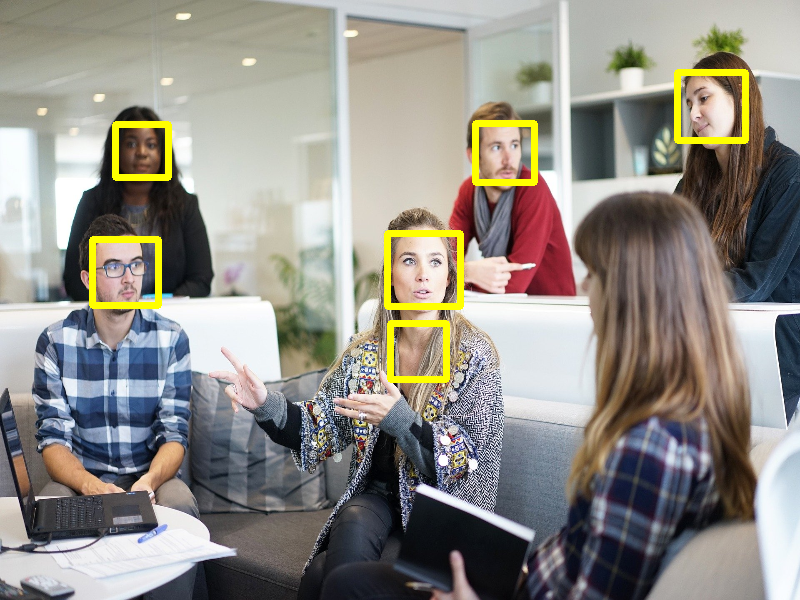

In [ ]:
for (x, y, w, h) in detections:
  #print(x, y, w, h)
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,255), 5)  # (x,y) -> 직사각형 시작 위치 & (x+y, y+h) -> 직사각형이 끝나는 위치
cv2_imshow(image)

# 정보를 기반으로 얼굴 위치에 직사각형 그리기

### Haarcascade parameters

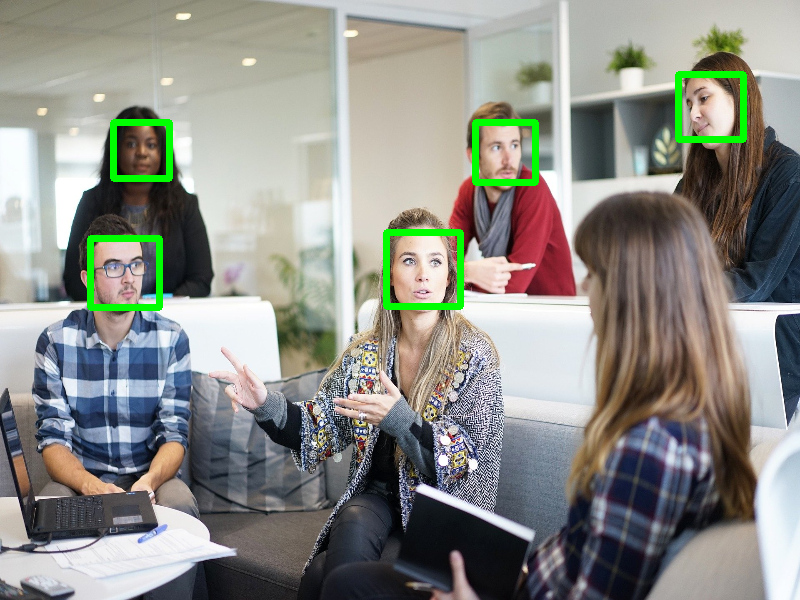

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Computer_vision/Images/people1.jpg')
image = cv2.resize(image, (800, 600))
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = face_detector.detectMultiScale(image_gray, scaleFactor = 1.09)
for (x, y, w, h) in detections:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 5)
cv2_imshow(image)
# scaleFactor = 1.09 --> 매개변수
# scaleFactor값이 작을수록 더 많은 시간 소요됨
# scaleFactor = 1.01 ==> 스케일 값이 작기 때문에 알고리즘이 이미지 크기를 축소한 것처럼 되어서 훨씬 더 많은 감지가 발생됨
# 즉, 적절한 매개변수 조절이 필요!

47 47
47 47
49 49
49 49
52 52
51 51
46 46
50 50
44 44
51 51
51 51
47 47


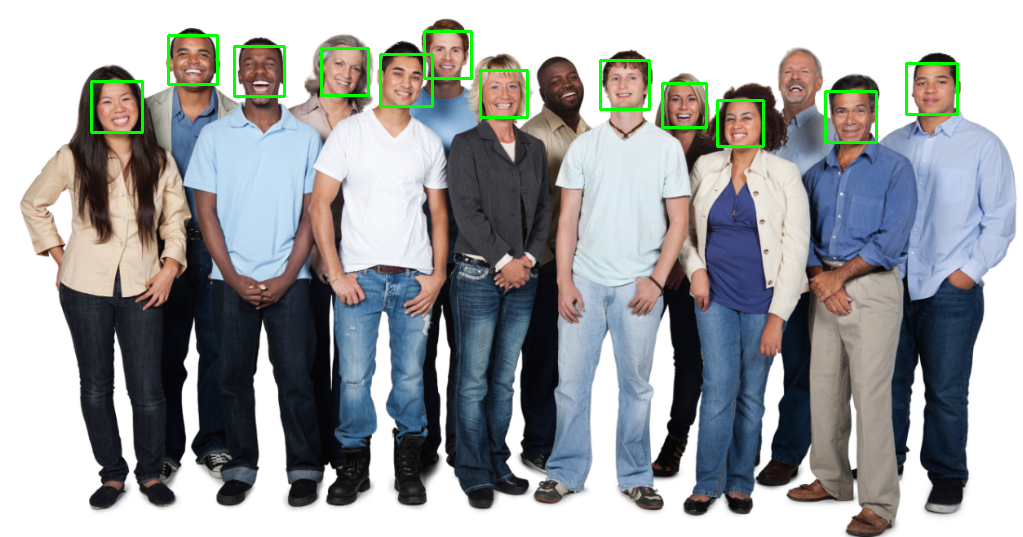

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Computer_vision/Images/people2.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = face_detector.detectMultiScale(image_gray, scaleFactor=1.2, minNeighbors=7,
                                            minSize=(20,20), maxSize=(100,100))
for (x, y, w, h) in detections:
  print(w, h)
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)
cv2_imshow(image)

# scaleFactor 매개변수 하나로 오류를 해결할 수 없는 경우 또 다른 매개변수 사용
# minNeighbors : 주위에 존재해야 하는 후보 직사각형의 수
# -> 이 과정은 투명하게 이뤄지므로 다른 직사각형은 볼 수 없고 최종 경계 박스만 관찰 가능

# minNeighbors=7 -> 이 경우 오류는 감지되지 않았지만 여전히 감지하지 못하는 얼굴 존재

# minSize=(20,20) -> 최소 감지되는 얼굴의 크기를 조정해 감지 수 조정


### Eye detection

In [ ]:
eye_detector = cv2.CascadeClassifier('/content/drive/MyDrive/Computer_vision/Cascades/haarcascade_eye.xml')

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Computer_vision/Images/people1.jpg')
#image = cv2.resize(image, (800, 600))
print(image.shape)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

face_detections = face_detector.detectMultiScale(image_gray, scaleFactor = 1.3, minSize = (30,30))
for (x, y, w, h) in face_detections:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)

eye_detections = eye_detector.detectMultiScale(image_gray, scaleFactor = 1.1, minNeighbors=10, maxSize=(70,70))
for (x, y, w, h) in eye_detections:
  print(w, h)
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,0,255), 2)

cv2_imshow(image)

# scaleFactor를 낮게 설정하면 더 많은 수의 객체가 감지됨 & but, 감지 품질이 낮아짐

### Other objects

#### Cars

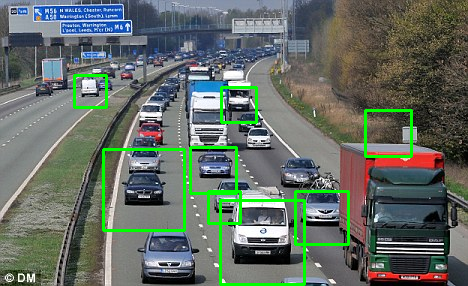

In [ ]:
car_detector = cv2.CascadeClassifier('/content/drive/MyDrive/Cursos - recursos/Computer Vision Masterclass/Cascades/cars.xml')
image = cv2.imread('/content/drive/MyDrive/Cursos - recursos/Computer Vision Masterclass/Images/car.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = car_detector.detectMultiScale(image_gray, scaleFactor = 1.03, minNeighbors=5)
for (x, y, w, h) in detections:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)
cv2_imshow(image)

#### Clocks

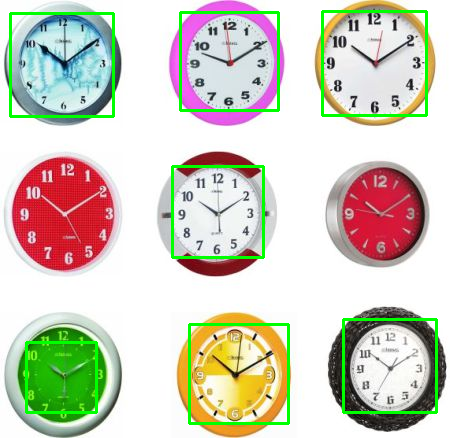

In [ ]:
clock_detector = cv2.CascadeClassifier('/content/drive/MyDrive/Cursos - recursos/Computer Vision Masterclass/Cascades/clocks.xml')
image = cv2.imread('/content/drive/MyDrive/Cursos - recursos/Computer Vision Masterclass/Images/clock.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = clock_detector.detectMultiScale(image_gray, scaleFactor = 1.03, minNeighbors=1)
for (x, y, w, h) in detections:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)
cv2_imshow(image)

#### Full body

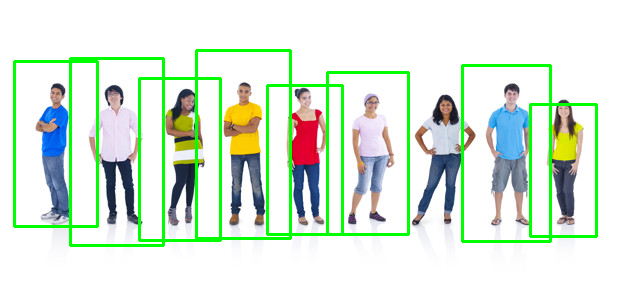

In [ ]:
full_detector = cv2.CascadeClassifier('/content/drive/MyDrive/Cursos - recursos/Computer Vision Masterclass/Cascades/fullbody.xml')
image = cv2.imread('/content/drive/MyDrive/Cursos - recursos/Computer Vision Masterclass/Images/people3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = full_detector.detectMultiScale(image_gray, scaleFactor = 1.05, minNeighbors=5,
                                              minSize = (50,50))
for (x, y, w, h) in detections:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)
cv2_imshow(image)

## Dlib

In [ ]:
import dlib

### Detecting faces with HOG

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Computer_vision/Images/people2.jpg')
cv2_imshow(image)

In [ ]:
face_detector_hog = dlib.get_frontal_face_detector()

In [ ]:
detections = face_detector_hog(image, 1)

In [ ]:
detections

rectangles[[(429, 38) (465, 74)], [(665, 90) (701, 126)], [(717, 103) (760, 146)], [(909, 70) (952, 113)], [(828, 98) (871, 142)], [(605, 70) (641, 106)], [(777, 62) (813, 98)], [(485, 78) (521, 114)], [(386, 60) (429, 103)], [(170, 41) (213, 84)], [(93, 89) (136, 132)], [(237, 50) (280, 94)], [(323, 50) (367, 94)], [(544, 65) (588, 108)]]

In [ ]:
detections, len(detections)

(rectangles[[(429, 38) (465, 74)], [(665, 90) (701, 126)], [(717, 103) (760, 146)], [(909, 70) (952, 113)], [(828, 98) (871, 142)], [(605, 70) (641, 106)], [(777, 62) (813, 98)], [(485, 78) (521, 114)], [(386, 60) (429, 103)], [(170, 41) (213, 84)], [(93, 89) (136, 132)], [(237, 50) (280, 94)], [(323, 50) (367, 94)], [(544, 65) (588, 108)]],
 14)

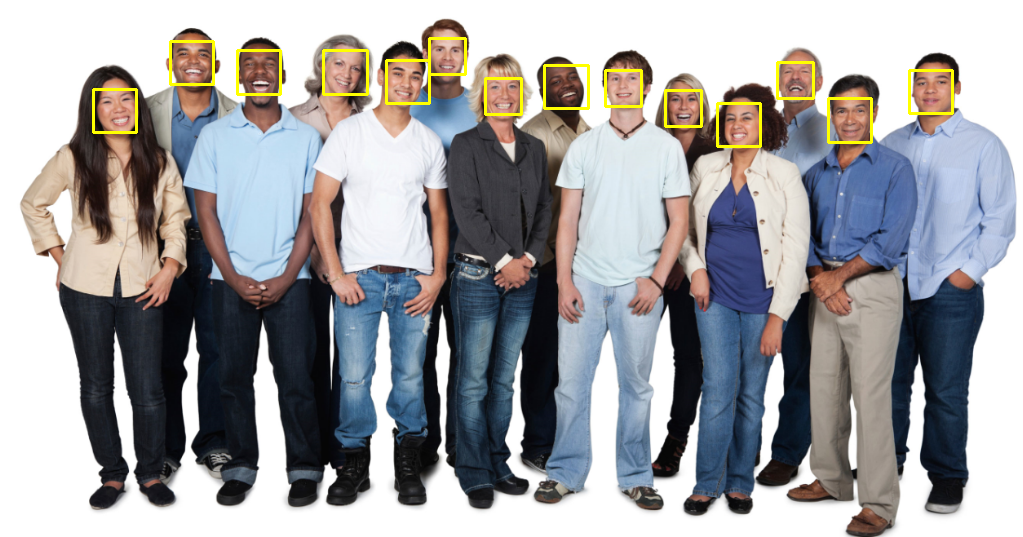

In [ ]:
# 경계상자 그리기
for face in detections:
  #print(face)
  #print(face.left())
  #print(face.top())
  #print(face.right())
  #print(face.bottom())
  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(image, (l, t), (r, b), (0, 255, 255), 2)
cv2_imshow(image)

### Detecting faces with CNN (Convolutional Neural Networks)

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Computer_vision/Images/people2.jpg')
cnn_detector = dlib.cnn_face_detection_model_v1('/content/drive/MyDrive/Computer_vision/Weights/mmod_human_face_detector.dat')

In [ ]:
detections = cnn_detector(image, 1)
for face in detections:
  l, t, r, b, c = face.rect.left(), face.rect.top(), face.rect.right(), face.rect.bottom(), face.confidence
  print(c)
  cv2.rectangle(image, (l, t), (r, b), (255, 255, 0), 2)
cv2_imshow(image)

# c : 각 감지의 신뢰도를 알려주는 신뢰도 측정
# 출력되는 숫자는 감지의 신뢰도이며, 숫자가 높을수록 감지의 질이 높음을 의미함

### Haarcascade x HOG x CNN

#### Haarcascade

In [ ]:
image.shape

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Computer_vision/Images/people3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
haarcascade_detector = cv2.CascadeClassifier('/content/drive/MyDrive/Computer_vision/Cascades/haarcascade_frontalface_default.xml')
detections = haarcascade_detector.detectMultiScale(image_gray, scaleFactor = 1.001, minNeighbors=5, minSize = (5,5))
for (x, y, w, h) in detections:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)
cv2_imshow(image)

#### HOG

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Computer_vision/Images/people3.jpg')
face_detector_hog = dlib.get_frontal_face_detector()
detections = face_detector_hog(image, 4)
for face in detections:
    l, t, r, b = (face.left(), face.top(), face.right(), face.bottom())
    cv2.rectangle(image, (l, t), (r, b), (0, 255, 255), 2)
cv2_imshow(image)

#### CNN

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Computer_vision/Images/people3.jpg')
cnn_detector = dlib.cnn_face_detection_model_v1('/content/drive/MyDrive/Computer_vision/Weights/mmod_human_face_detector.dat')
detections = cnn_detector(image, 4)
for face in detections:
  l, t, r, b, c = face.rect.left(), face.rect.top(), face.rect.right(), face.rect.bottom(), face.confidence
  print(c)
  cv2.rectangle(image, (l, t), (r, b), (255, 255, 0), 2)
cv2_imshow(image)